In [1]:
import numpy as np
import cv2
import  imutils
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\intelpython3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<h3>Defining Functions</h3>

In [2]:
"""
function to print RGB images
"""
def ShowInColor(image_or_frame):
    RGB_image = cv2.cvtColor(image_or_frame, cv2.COLOR_BGR2RGB)# coverting from BGR scheme to RGB color format
    plt.axis("off")       # so as not to have the axis that show the scale of the images
    plt.imshow(RGB_image) # this is for displaying the image
    # [we didnt add plt() because we used the magic function %pylab inline]

In [3]:
"""
function to convert to grayscale
"""
def Turn2Gray(image_or_frame):
    return cv2.cvtColor(image_or_frame, cv2.COLOR_BGR2GRAY)

In [4]:
"""
function to print grayscale images
"""
def ShowInGray(image_or_frame):
    plt.axis("off")
    plt.imshow(image_or_frame, cmap='gray')

In [5]:
"""
function bilateral filtered images
-> Noise removal with iterative bilateral filter(removes noise while preserving edges)
"""
def Apply_BilFilter(image_or_frame):
    return cv2.bilateralFilter(image_or_frame, 11, 17, 17)

In [6]:
"""
function edge detection within images
-> Find Edges of the grayscale image
"""
def Apply_EdgeDet(image_or_frame):
    return cv2.Canny(image_or_frame, 170, 200)

<h3>Now the coding begins</h3>

In [7]:
# Read the image file
image = cv2.imread('lpr_test5.jpg')

In [8]:
# Resize the image - change width to 500
image = imutils.resize(image, width=500)

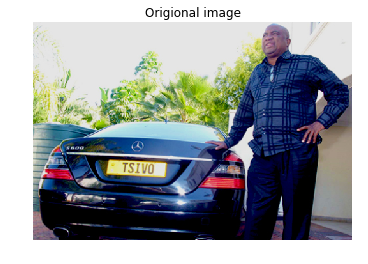

In [9]:
# Display the original image
#cv2.imshow("Original Image", image)
plt.title('Origional image')
ShowInColor(image)

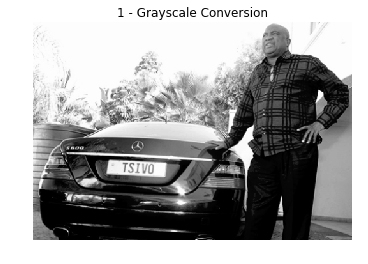

In [10]:
# RGB to Gray scale conversion
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.title("1 - Grayscale Conversion") # to have a title on the image
gray = Turn2Gray(image)# image conversion to grayscale
ShowInGray(gray)

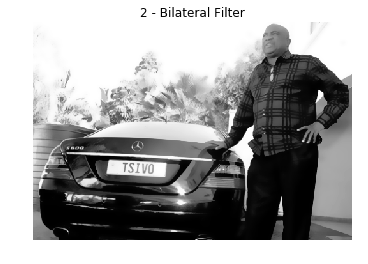

In [11]:
# Noise removal with iterative bilateral filter(removes noise while preserving edges)
plt.title("2 - Bilateral Filter")
gray = Apply_BilFilter(gray)
ShowInGray(gray)

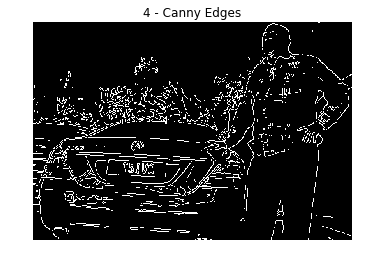

In [12]:
# Find Edges of the grayscale image
plt.title("4 - Canny Edges")
edged = Apply_EdgeDet(gray)
ShowInGray(edged)

<pre>
<b>Contours</b> can be explained simply as a curve joining all the continuous points (along the boundary),
having same color or intensity.
The contours are a useful tool for shape analysis and object detection and recognition.
</pre>

In [13]:
# Find contours based on Edges
(new, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


#sort contours based on their area keeping minimum required area as '30' 
#(anything smaller than this will not be considered)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:30]

NumberPlateCnt = None #we currently have no Number plate contour

In [14]:
# loop over our contours to find the best possible approximate contour of number plate
count = 0
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:  # Select the contour with 4 corners
            NumberPlateCnt = approx #This is our approx Number Plate Contour
            break

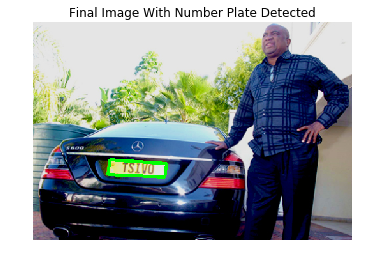

In [15]:
# Drawing the selected contour on the original image
cv2.drawContours(image, [NumberPlateCnt], -1, (0,255,0), 3)
#cv2.imshow("Final Image With Number Plate Detected", image)
plt.title("Final Image With Number Plate Detected")
ShowInColor(image)
#cv2.waitKey(0) #Wait for user input before closing the images displayed